In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets

%matplotlib inline

import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display
from IPython.display import Image




In [22]:
data1 = pd.read_csv('./output/df_to_plot_artists_with_most_songs.csv')
data = pd.read_csv('./output/clean_data.csv')


# 🎙🎶🎵 PLEASE DON'T STOP THE MUSIC! 🎙🎶🎵
### A travel trough Deezer and Spotify data visualization.

In [23]:
fig = px.bar(data1,
             x='artists', y='cumsum',
             color='artists',
             animation_frame='year', animation_group='year',
             range_y=[0,1300],
             title='Artists with Most Songs')
fig.show()

#### As we can see, the artist with most songs trough the years is 'Эрнест Хемингуэй',followed by Francisco Canaro.

In [24]:
@widgets.interact_manual(
    Year = range(1921,2021))
def plot(Year = 2020):
    '''
    Esta función nos permite seleccionar en un desplegable el año deseado entre 1921 y 2020 
    y nos permite obtener el top de las 10 canciones más populares de dicho año. 
    '''
    pop = data[data['year'] == Year]
    pop = pop[['name','popularity','year']].sort_values('popularity').tail(10)
    fig = plt.figure(figsize=(15,5))
    plt.bar( pop['name'],
             pop['popularity'],
             width=0.4,
             color = ['#ffb600','#ffaa00','#ff9e00','#ff9100','#ff8500','#ff7900','#ff6d00','#ff6000','#ff5400','#ff4800'])
    plt.xticks(rotation=45,ha='right')
    t = 'Top 10 Most Popular Songs of ' + str(Year)
    plt.title(t,y=1.1,fontsize=20)
    plt.xlabel('Songs')
    plt.ylabel('Popularity (Ranges from 0 to 100)')
    

interactive(children=(Dropdown(description='Year', index=99, options=(1921, 1922, 1923, 1924, 1925, 1926, 1927…

### With this plot we can select a year and discover the top 10 most popular songs. For example, in this 2020 the TOP 3 which have reached the podium 🏆 are...: 🥇Safaera, 🥈Rain On Me and 🥉GOOBA 

**Take a listen:**\
[Safaera](https://www.youtube.com/watch?v=jCQ_6XbATPc)\
[Rain On Me](https://www.youtube.com/watch?v=AoAm4om0wTs)\
[GOOBA](https://www.youtube.com/watch?v=pPw_izFr5PA)

In [25]:
@widgets.interact_manual(
    Year = range(1921,2021))
def plot(Year = 2020):
    '''
    Esta función nos permite seleccionar en un desplegable el año deseado entre 1921 y 2020 
    y nos permite obtener el top de los 10 artistas más populares de dicho año. 
    '''
    arpop = data[data['year'] == Year]
    arpop = pd.DataFrame(arpop.groupby('artists')['popularity'].sum()).sort_values('popularity').tail(10).reset_index()
    fig = plt.figure(figsize=(15,5))
    plt.bar( arpop['artists'],
             arpop['popularity'],
             width=0.45,
             color = ['#caf0f8','#ade8f4','#90e0ef','#48cae4','#00b4d8','#0096c7','#0077b6','#023e8a','#03045e','#14213d'])
    plt.xticks(rotation=45,ha='right')
    t='Top 10 Most Popular Artists from '+str(Year)
    plt.title(t,y=1.1,fontsize=20)
    plt.xlabel('Artists')
    plt.ylabel('Popularity (Ranges from 0 to 100)')
    

interactive(children=(Dropdown(description='Year', index=99, options=(1921, 1922, 1923, 1924, 1925, 1926, 1927…

### With this plot we can select a year and discover the top 10 most popular artists. Can you identify them?

![Lil Uzi Vert](https://miro.medium.com/max/1400/1*zbXu_WP0Vfo24nRNyYC4rg.jpeg)\
![The Weekend](https://www.dodmagazine.es/wp-content/uploads/2015/05/the-weeknd-abel-tesfaye.jpg)\
![Lil Baby](https://media.resources.festicket.com/image/600x600/center/top/filters:quality(70)/www/artists/lil-baby_L.jpg)

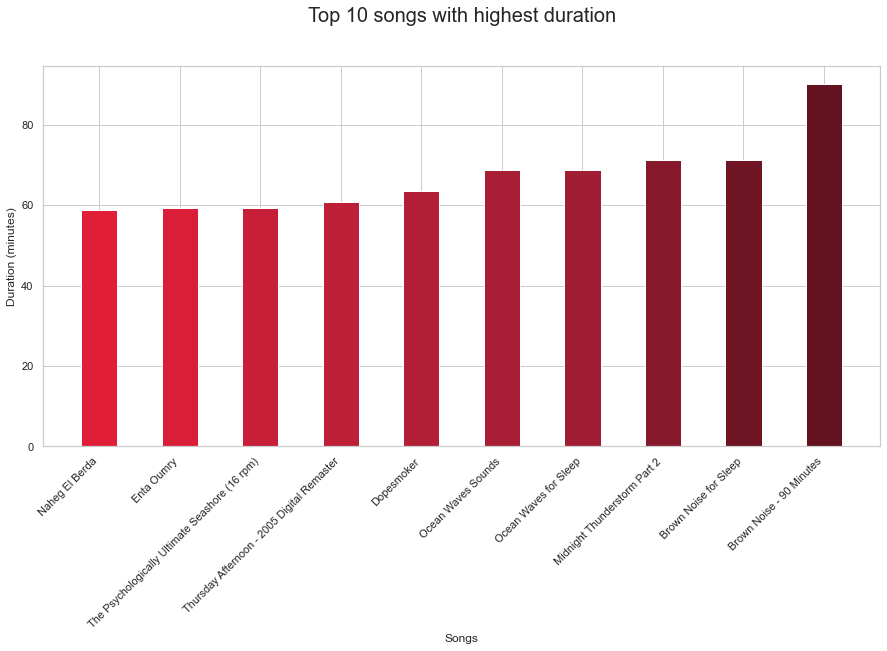

In [26]:
Image(filename = "output/top_ten_longest_songs.png", width = 1000, height = 800)

### Here we got the 10 longest songs in Spotify, most of them form people with insomnia problems.

### Did you know that '[the longest officially released song](https://www.guinnessworldrecords.com/world-records/longest-officially-released-song) is "The Rise and Fall of Bossanova (A 13:23:32 song)" by PC III (USA) which lasts 13 hr 23 min 32 sec, released on 1 November 2016 '?

In [27]:
#top 5 songs by category

@widgets.interact_manual(
    Category = ['danceability','energy','instrumentalness','liveness','speechiness','tempo'])
def plot(Category = 'danceability'):
    '''
    Esta función nos permite seleccionar en un desplegable la categoría deseada entre: 'acousticness','danceability','energy','instrumentalness','liveness','speechiness','tempo'
    y nos permite obtener el top de las 5 canciones en dicha categoría.
    '''
    df = pd.DataFrame(data[[Category,'name']]).sort_values(Category).tail().set_index('name')
    
    ax = df.plot(kind='barh', 
          figsize = (8, 5), 
          width = 0.5,
          color='#75daad')
    t='Top 5 Songs According to ' + Category
    plt.title(t,y=1.1,fontsize=20)
    plt.xlabel(Category)
    plt.ylabel('Songs')
    plt.xlim(0.96,1)
    plt.yticks(fontsize=20)
    ax.get_legend().remove()

interactive(children=(Dropdown(description='Category', options=('danceability', 'energy', 'instrumentalness', …

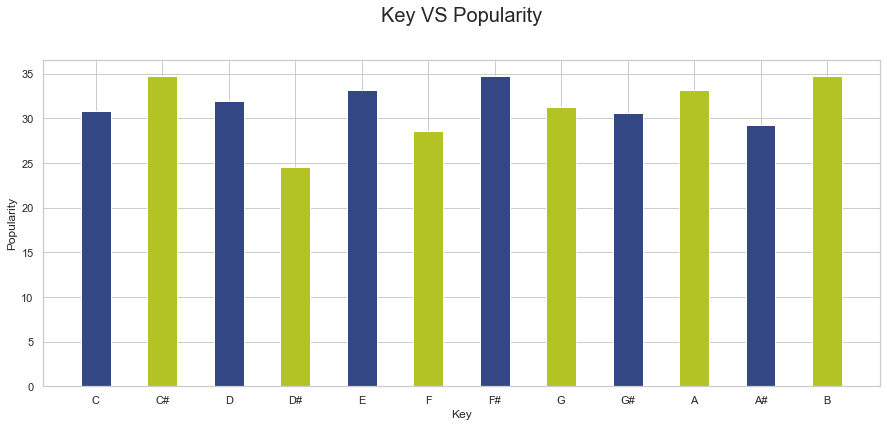

In [28]:
Image(filename = "output/key vs popularity.png", width = 1000, height = 800)

### Does the main key of a song matters when we talk about popularity? 
#### Well, there are several studies about this interesting question as the one I have been reading from the **Washington Post** [The secret math behind feel-good music](https://www.washingtonpost.com/news/to-your-health/wp/2015/10/30/the-mathematical-formula-behind-feel-good-songs/). As it says:

#### 'Beats automatically activate motor areas of the brain, according to magnetic resonance imaging studies, and propel our bodies to move spontaneously to the rhythm. Therefore, fast-tempo songs are directly associated with more energy, movement, and dancing, which are typically linked to being in a joyful state.However, other characteristics of music such as key are not as well-understood. “That's a bit of a mystery, why we assign major chords with positive emotions and minor chords with negative emotions. There's definitely an element of learned association, although there are some people who claim it's more of a biological thing,” said Jolij. “It's still one of the big questions in musicology.”'

#### So, let's try, take a break and investigate yourself how the keys of the different songs can influence your mood.

#### Are you a bit moody? I can try to help... [DON'T STOP ME NOW!](https://www.youtube.com/watch?v=HgzGwKwLmgM)


In [29]:
def top_popular_artists(data, lower_bound, upper_bound):
    '''
    Esta función nos permite obtener un gráfico de barras horizontales con el top de artistas por popularidad.
    '''
    res_index =  data.groupby(['artists']).sum()['popularity'].sort_values(ascending = False)[lower_bound:upper_bound].index[::-1]     
    # order of index to make right values in right places
    total_value_of_popularity =  data.groupby(['artists']).sum()['popularity'].sort_values(ascending = False)[
    lower_bound:upper_bound].reindex(res_index)
    
    total_songs = data['artists'].value_counts().round(0).reindex(res_index)   
    
    df = pd.DataFrame({('Artist ') :total_value_of_popularity.index, 
                        ('Total Artist Popularity '): total_value_of_popularity.values,
                        ('Total Song Count '): total_songs.values}) 
  
    fig = px.bar(df, x = ('Total Artist Popularity ') , y = ('Artist '),
                    
                     hover_data = [('Total Artist Popularity '), ('Total Song Count ')],
                                       
                     color = ('Total Artist Popularity ') , title= f'Artists Popularity Ranked ({lower_bound +1},{upper_bound})',
               
                     height = 700  )

    return fig.show()

In [31]:
top_popular_artists(data, 0, 30)

This final plot shows us the top popular artists in the data provided by the Spotify Web API used by the [Kaggle dataset](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_w_genres.csv) creator.

As we can see 'The Beatles' are leading with a considerable difference from 'The Rolling' who are in second place followed by the King of Pop.

As a gift I leave you here my favourite songs of the podium most popular groups:

[Hey Jude - The Beatles](https://www.youtube.com/watch?v=A_MjCqQoLLA)

[She's A Rainbow - The Rolling Stones](https://www.youtube.com/watch?v=6c1BThu95d8)🌈🌈🌈

[Can't Help Falling In Love With You - Elvis Presley](https://www.youtube.com/watch?v=vGJTaP6anOU)